# Naive Bayes Model

#### Note: Please run the EDA file before running this Model

## Import the necessary libraries:

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## Loading Dataset

In [61]:
data = pd.read_csv("CSV_Files/train_data.csv")
data.head(10)

,CURRENT_HOUSE_YRS,Income_Bin,Married_Single_Encoded,House_Ownership_Encoded,Car_Ownership_Encoded,Profession_Air traffic controller,Profession_Air_traffic_controller,Profession_Analyst,Profession_Architect,Profession_Army officer,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical Engineer,Profession_Biomedical_Engineer,Profession_Chartered Accountant,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical engineer,Profession_Chemical_engineer,Profession_Civil engineer,Profession_Civil servant,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer hardware engineer,Profession_Computer operator,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design Engineer,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion Designer,Profession_Fashion_Designer,Profession_Financial Analyst,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight attendant,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic Designer,Profession_Graphic_Designer,Profession_Hotel Manager,Profession_Hotel_Manager,Profession_Industrial Engineer,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical engineer,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum Engineer,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police officer,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software Developer,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical writer,Profession_Technical_writer,Profession_Technician,Profession_Technology specialist,Profession_Technology_specialist,Profession_Web designer,Profession_Web_designer,STATE_Andhra_Pradesh,STATE_Assam,STATE_Bihar,STATE_Chandigarh,STATE_Chhattisgarh,STATE_Delhi,STATE_Gujarat,STATE_Haryana,STATE_Himachal_Pradesh,STATE_Jammu_and_Kashmir,STATE_Jharkhand,STATE_Karnataka,STATE_Kerala,STATE_Madhya_Pradesh,STATE_Maharashtra,STATE_Manipur,STATE_Mizoram,STATE_Odisha,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttarakhand,STATE_West_Bengal,cat_age,cat_exp,cat_CURRENT_JOB_YRS,Risk_Flag
0,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,2,1
1,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,1
2,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,2,2,1
3,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1
4,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,2,1
5,14,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,2,3,1
6,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [62]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

# Assuming data is your DataFrame
data.head(10)

,CURRENT_HOUSE_YRS,Income_Bin,Married_Single_Encoded,House_Ownership_Encoded,Car_Ownership_Encoded,Profession_Air traffic controller,Profession_Air_traffic_controller,Profession_Analyst,Profession_Architect,Profession_Army officer,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical Engineer,Profession_Biomedical_Engineer,Profession_Chartered Accountant,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical engineer,Profession_Chemical_engineer,Profession_Civil engineer,Profession_Civil servant,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer hardware engineer,Profession_Computer operator,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design Engineer,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion Designer,Profession_Fashion_Designer,Profession_Financial Analyst,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight attendant,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic Designer,Profession_Graphic_Designer,Profession_Hotel Manager,Profession_Hotel_Manager,Profession_Industrial Engineer,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical engineer,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum Engineer,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police officer,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software Developer,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical writer,Profession_Technical_writer,Profession_Technician,Profession_Technology specialist,Profession_Technology_specialist,Profession_Web designer,Profession_Web_designer,STATE_Andhra_Pradesh,STATE_Assam,STATE_Bihar,STATE_Chandigarh,STATE_Chhattisgarh,STATE_Delhi,STATE_Gujarat,STATE_Haryana,STATE_Himachal_Pradesh,STATE_Jammu_and_Kashmir,STATE_Jharkhand,STATE_Karnataka,STATE_Kerala,STATE_Madhya_Pradesh,STATE_Maharashtra,STATE_Manipur,STATE_Mizoram,STATE_Odisha,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttarakhand,STATE_West_Bengal,cat_age,cat_exp,cat_CURRENT_JOB_YRS,Risk_Flag
0,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,2,1
1,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,1
2,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,2,2,1
3,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1
4,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,2,1
5,14,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,2,3,1
6,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [63]:
data.shape

(34904, 111)

# Basic EDA

<Axes: >

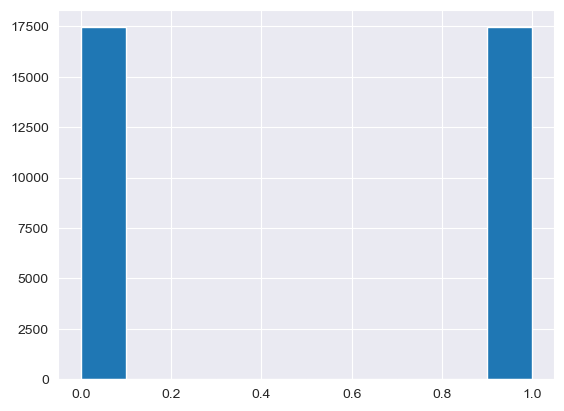

In [64]:
data["Risk_Flag"].hist()

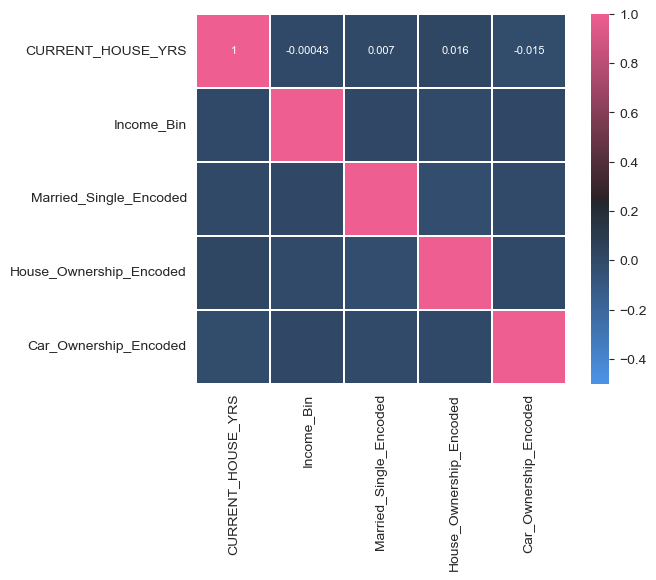

In [65]:

# Select subset of features (e.g., first 20 columns)
subset_features = data.iloc[:, :5]

# Calculate correlation matrix for subset of features
corr_subset = subset_features.corr(method="pearson")

# Increase figure size
# plt.figure(figsize=(12, 10))

# Define colormap
cmap = sns.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)

# Create heatmap for subset of features
sns.heatmap(corr_subset, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2, annot=True, annot_kws={"size": 8})

# Show plot
plt.show()


C:\Users\gauta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gauta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gauta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gauta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

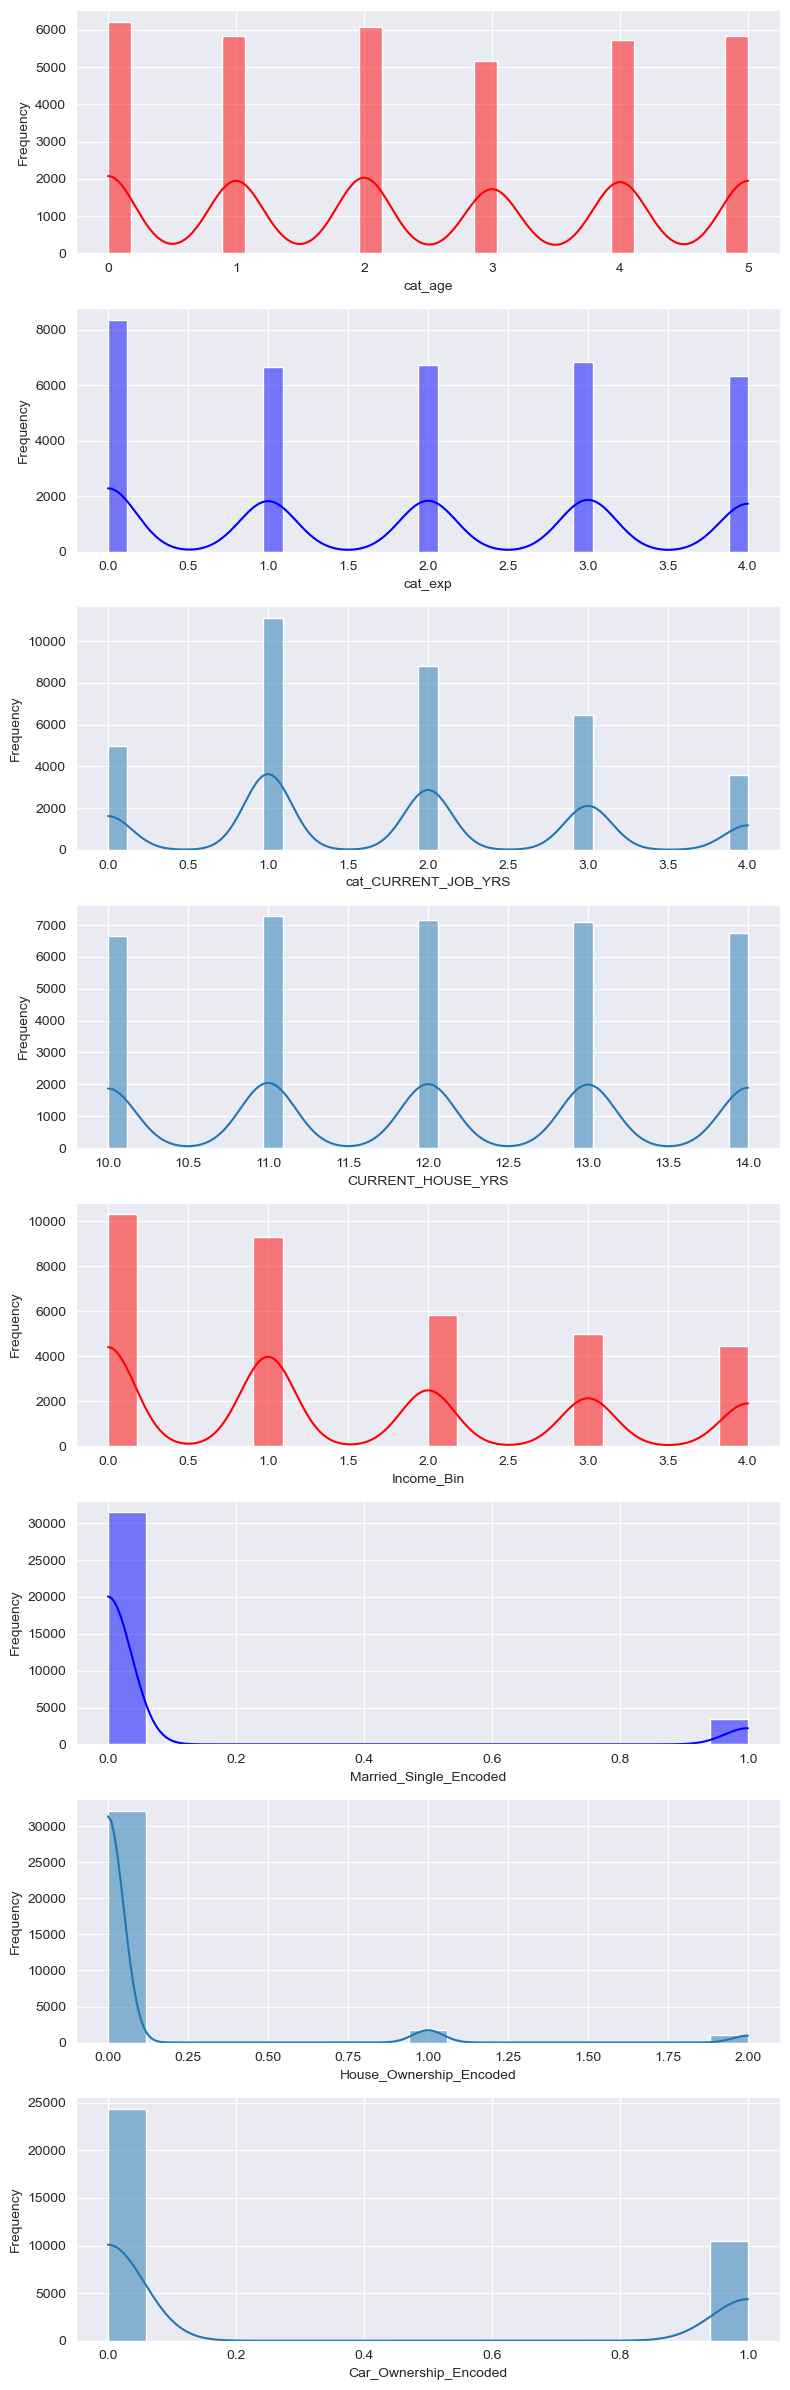

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 8 rows and 1 column
fig, axes = plt.subplots(8, 1, figsize=(8, 24), sharex=False)

# Plot each histogram in a separate subplot
sns.histplot(data, ax=axes[0], x="cat_age", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="cat_exp", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="cat_CURRENT_JOB_YRS", kde=True)
sns.histplot(data, ax=axes[3], x="CURRENT_HOUSE_YRS", kde=True)
sns.histplot(data, ax=axes[4], x="Income_Bin", kde=True, color='r')
sns.histplot(data, ax=axes[5], x="Married_Single_Encoded", kde=True, color='b')
sns.histplot(data, ax=axes[6], x="House_Ownership_Encoded", kde=True)
sns.histplot(data, ax=axes[7], x="Car_Ownership_Encoded", kde=True)

# Set labels and title for each subplot
for i, col in enumerate(data.columns[:8]):
    axes[i].set_ylabel('Frequency')
    #axes[i].set_title(f'Histogram of {col}')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# Implementation of Naive Bayes

## Calculate Prior Probability P(Y=y) for all possible y(classes)

In [67]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append((len(df[df[Y]==i]) + 1) / (len(df) + len(classes)))
    return prior

## Calculate P(X=x|Y=y) categorically (Likelihood calculation of a class)

In [68]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    df = df[df[Y]==label]
    num = len(df[df[feat_name]==feat_val]) + 1
    denom = len(df) + len(df[feat_name].unique())
    p_x_given_y = num / denom
    return p_x_given_y

## Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y(classes) and find the maximum

In [69]:
def naive_bayes_categorical(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

# Results from external library

## Running Categorical Naive Bayes Model

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
import matplotlib.pyplot as plt
import seaborn as sns
X = data.drop(columns=['Risk_Flag'])
y = data['Risk_Flag']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Categorical Naive Bayes model
nb_model = CategoricalNB()
nb_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = nb_model.predict(X_test)

## Result Stats

Confusion Matrix:
[[2252 1258]
 [ 867 2604]]


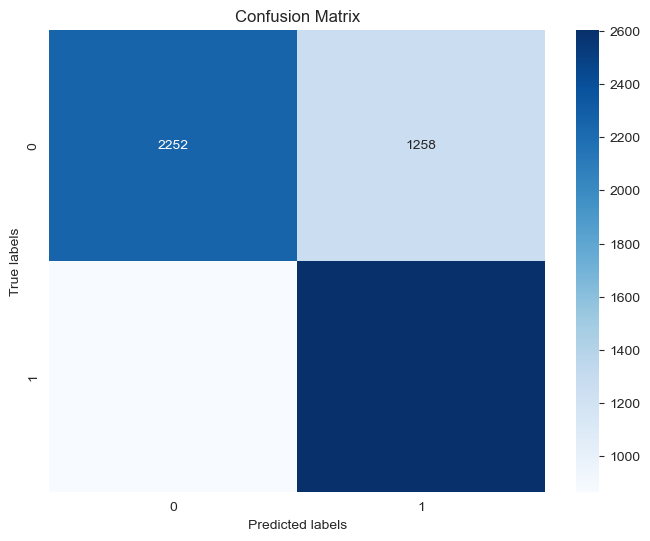


Accuracy: 0.6956023492336342
F1 Score: 0.7102141006409383

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      3510
           1       0.67      0.75      0.71      3471

    accuracy                           0.70      6981
   macro avg       0.70      0.70      0.69      6981
weighted avg       0.70      0.70      0.69      6981



In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

# Calculating and printing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculating and printing the accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("F1 Score:", f1)

# Printing other classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

## Running Gaussian Naive Bayes Model

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
X = data.drop(columns=['Risk_Flag'])
y = data['Risk_Flag']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Categorical Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = nb_model.predict(X_test)

## Result Stats

Confusion Matrix:
[[3113  397]
 [2839  632]]


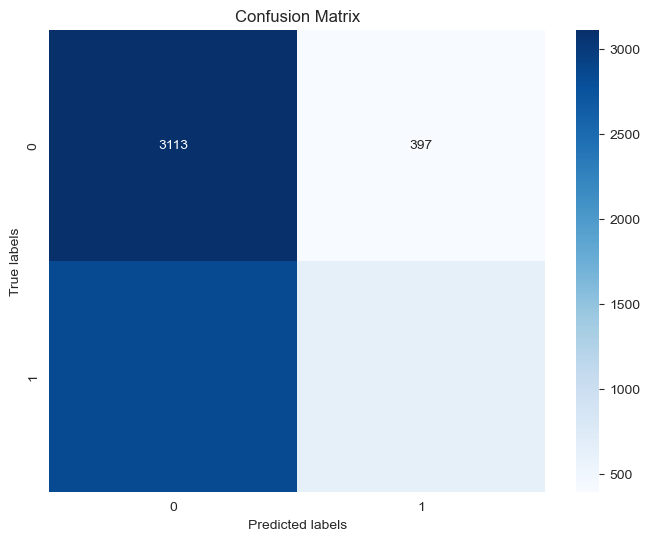


Accuracy: 0.536456095115313
F1 Score: 0.28088888888888885

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.89      0.66      3510
           1       0.61      0.18      0.28      3471

    accuracy                           0.54      6981
   macro avg       0.57      0.53      0.47      6981
weighted avg       0.57      0.54      0.47      6981



In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

# Calculating and printing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculating and printing the accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("F1 Score:", f1)

# Printing other classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [74]:
# As we have seen in the EDA that our data is discrete, not continuous thats why Naive Bayes Categorical Model works better than the Gaussian Model.
# Categorical Naive Bayes has a far better accuracy (in this case) than Gaussian Naive Bayes

# Results from our implementation

In [75]:
# Note: Running Model on our implementation takes a lot of time as we have more than 100 features and around 30,000 data samples
# To run this Model on our implementation, we can either drop some feautures or reduce the number of data samples

## Case 1: Reducing the number of Data Samples

In [76]:
# Assuming data is your DataFrame
sampled_data = data.sample(n=2000, random_state=42)

# Extract the 'Risk_Flag' column
risk_flag = sampled_data['Risk_Flag']

# Drop the 'Risk_Flag' column from the DataFrame
sampled_data = sampled_data.drop(columns=['Risk_Flag'])

# Concatenate the 'Risk_Flag' column to the end of the DataFrame
sampled_data['Risk_Flag'] = risk_flag

# Now sampled_data contains around 1,000 rows with 'Risk_Flag' column at the end
sampled_data.head(10)

,CURRENT_HOUSE_YRS,Income_Bin,Married_Single_Encoded,House_Ownership_Encoded,Car_Ownership_Encoded,Profession_Air traffic controller,Profession_Air_traffic_controller,Profession_Analyst,Profession_Architect,Profession_Army officer,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical Engineer,Profession_Biomedical_Engineer,Profession_Chartered Accountant,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical engineer,Profession_Chemical_engineer,Profession_Civil engineer,Profession_Civil servant,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer hardware engineer,Profession_Computer operator,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design Engineer,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion Designer,Profession_Fashion_Designer,Profession_Financial Analyst,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight attendant,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic Designer,Profession_Graphic_Designer,Profession_Hotel Manager,Profession_Hotel_Manager,Profession_Industrial Engineer,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical engineer,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum Engineer,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police officer,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software Developer,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical writer,Profession_Technical_writer,Profession_Technician,Profession_Technology specialist,Profession_Technology_specialist,Profession_Web designer,Profession_Web_designer,STATE_Andhra_Pradesh,STATE_Assam,STATE_Bihar,STATE_Chandigarh,STATE_Chhattisgarh,STATE_Delhi,STATE_Gujarat,STATE_Haryana,STATE_Himachal_Pradesh,STATE_Jammu_and_Kashmir,STATE_Jharkhand,STATE_Karnataka,STATE_Kerala,STATE_Madhya_Pradesh,STATE_Maharashtra,STATE_Manipur,STATE_Mizoram,STATE_Odisha,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttarakhand,STATE_West_Bengal,cat_age,cat_exp,cat_CURRENT_JOB_YRS,Risk_Flag
24278,10,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,1,1,1
28076,11,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,4,4,0
21857,12,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,2,1
24825,12,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1
12113,14,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
20286,13,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,1,0
24887,10,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Running on our Implementation

In [77]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(sampled_data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="Risk_Flag")

## Result Stats

Confusion Matrix:
[[114  76]
 [ 52 158]]


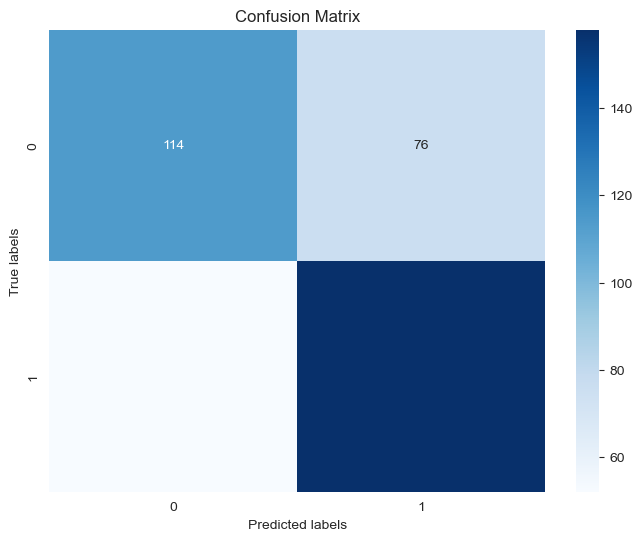


Accuracy: 0.68
F1 Score: 0.7117117117117117

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.60      0.64       190
           1       0.68      0.75      0.71       210

    accuracy                           0.68       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.68      0.68      0.68       400



In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

# Calculating and printing the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculating and printing the accuracy and F1 score
accuracy = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
print("\nAccuracy:", accuracy)
print("F1 Score:", f1)

# Printing other classification metrics
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

## Case 2: Reducing the number of features (dropping less useful features like STATE and Profession)

In [79]:
data = data[["cat_age",	"cat_exp",	"cat_CURRENT_JOB_YRS", "CURRENT_HOUSE_YRS", "Income_Bin", "Married_Single_Encoded", "House_Ownership_Encoded", "Car_Ownership_Encoded", "Risk_Flag"]]
data.head(10)

,cat_age,cat_exp,cat_CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Income_Bin,Married_Single_Encoded,House_Ownership_Encoded,Car_Ownership_Encoded,Risk_Flag
0,3,2,2,10,0,0,0,1,1
1,1,3,3,11,0,0,0,1,1
2,2,2,2,11,0,0,0,0,1
3,4,0,0,10,0,0,0,0,1
4,4,3,2,11,0,0,0,1,1
5,3,2,3,14,0,0,2,0,1
6,5,4,3,13,0,0,0,0,1
7,4,2,3,10,0,0,0,1,1
8,3,3,2,11,0,0,0,0,1
9,2,0,0,10,0,0,0,0,1


In [80]:
data.shape

(34904, 9)

## Running on our Implementation

In [81]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="Risk_Flag")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[2148 1355]
 [ 889 2589]]
0.6976556184316896


## Result Stats

Confusion Matrix:
[[2148 1355]
 [ 889 2589]]


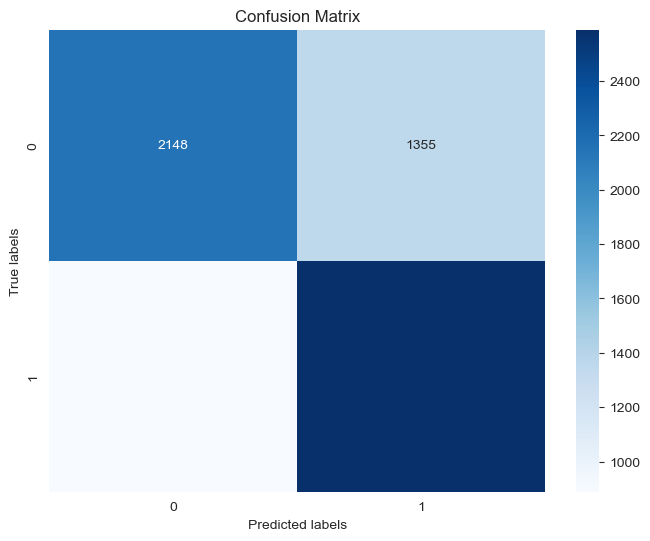


Accuracy: 0.6785560807907176
F1 Score: 0.6976556184316896

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.61      0.66      3503
           1       0.66      0.74      0.70      3478

    accuracy                           0.68      6981
   macro avg       0.68      0.68      0.68      6981
weighted avg       0.68      0.68      0.68      6981



In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

# Calculating and printing the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculating and printing the accuracy and F1 score
accuracy = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
print("\nAccuracy:", accuracy)
print("F1 Score:", f1)

# Printing other classification metrics
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))